<a href="https://colab.research.google.com/github/zubaidah93/CAP6545_project/blob/main/colab-gt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing graph-tool (https://graph-tool.skewed.de)

---


To import a library that's not in Colaboratory by default, we can use [condacolab](https://github.com/conda-incubator/condacolab) to install packages from conda.

In [ ]:
!pip install -q condacolab
import condacolab
# Workaround issue with Python 3.12:
# condacolab.install()
condacolab.install_from_url("https://github.com/conda-forge/miniforge/releases/download/25.3.1-0/Miniforge3-Linux-x86_64.sh")

Now we can install conda packages, and we do so for graph-tool.

In [ ]:
!mamba install -q graph-tool

In [ ]:
# Workaround issue with Python 3.12
!mamba install -q scipy

# Now we can use graph-tool as any other Python module

(If a crash occurs at this stage, just run the notebook again... This is related to the kernel switch done by condacolab.)

# Inline drawing works too!

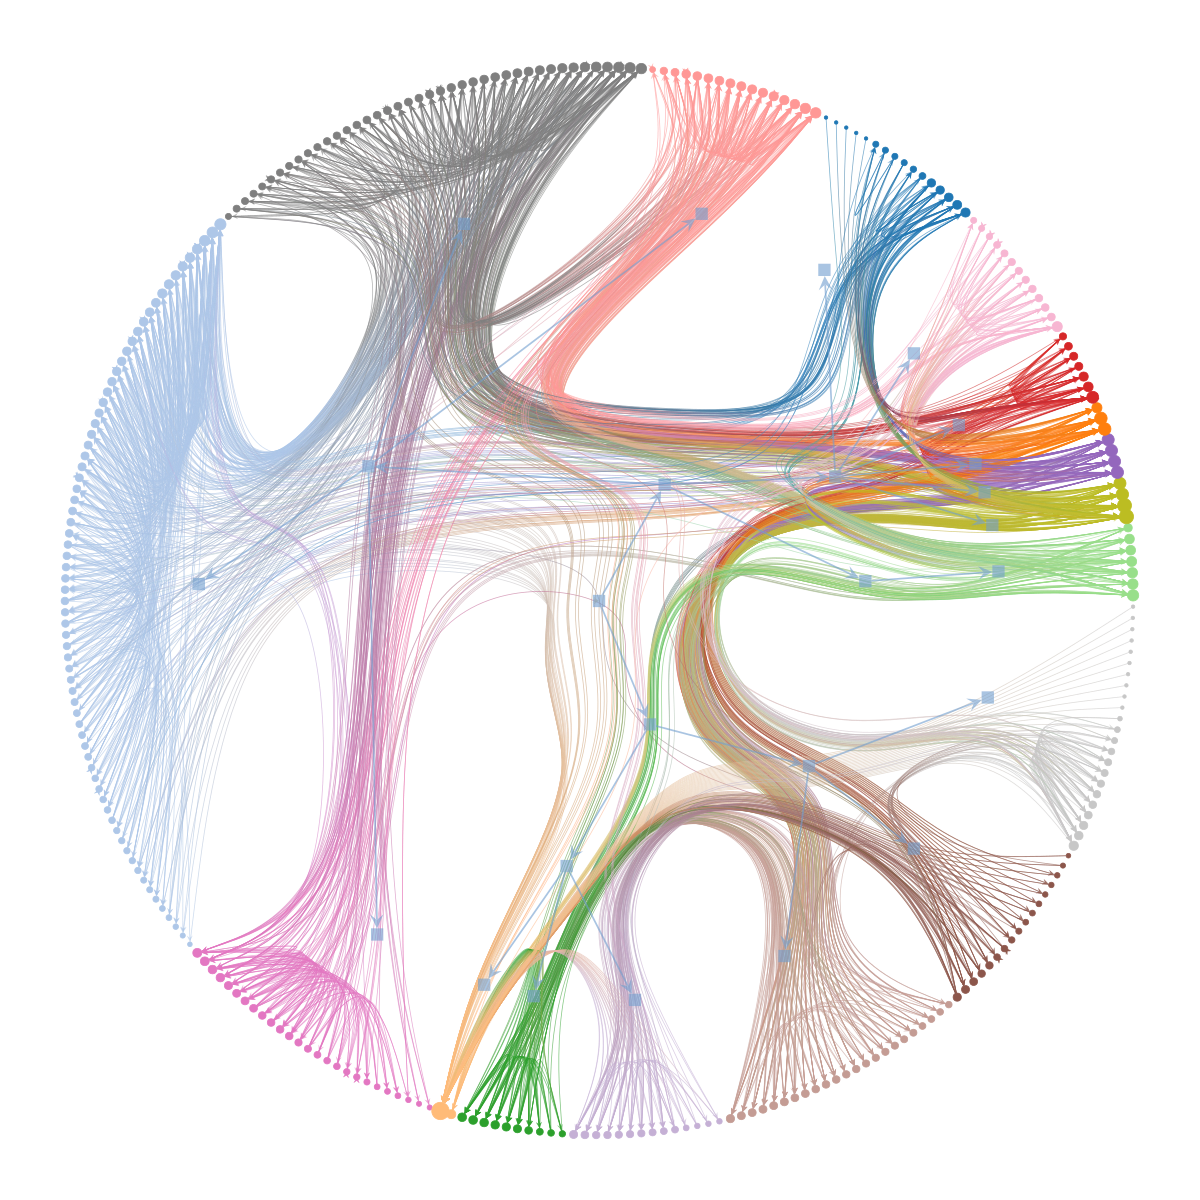

(<VertexPropertyMap object with value type 'vector<double>', for Graph 0x781c3111d6a0, at 0x781c2dc4e180>,
 <GraphView object, directed, with 322 vertices and 321 edges, edges filtered by <EdgePropertyMap object with value type 'bool', for Graph 0x781c313e4530, at 0x781c2dc5c440>, vertices filtered by <VertexPropertyMap object with value type 'bool', for Graph 0x781c313e4530, at 0x781c2dc8dd60>, at 0x781c313e4530>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x781c313e4530, at 0x781c2dc8dc70>)

In [12]:
from graph_tool.all import *

g = Graph()
v1 = g.add_vertex()
v2 = g.add_vertex()
e = g.add_edge(v1, v2)



In [14]:
!pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.9/887.9 MB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.3/594.3 MB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 158.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 63.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.8/954.8 kB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 706.8/706.8 MB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 MB 66.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 MB 38.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.5/267.5 MB 60.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 MB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.2/287.2 MB 63.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

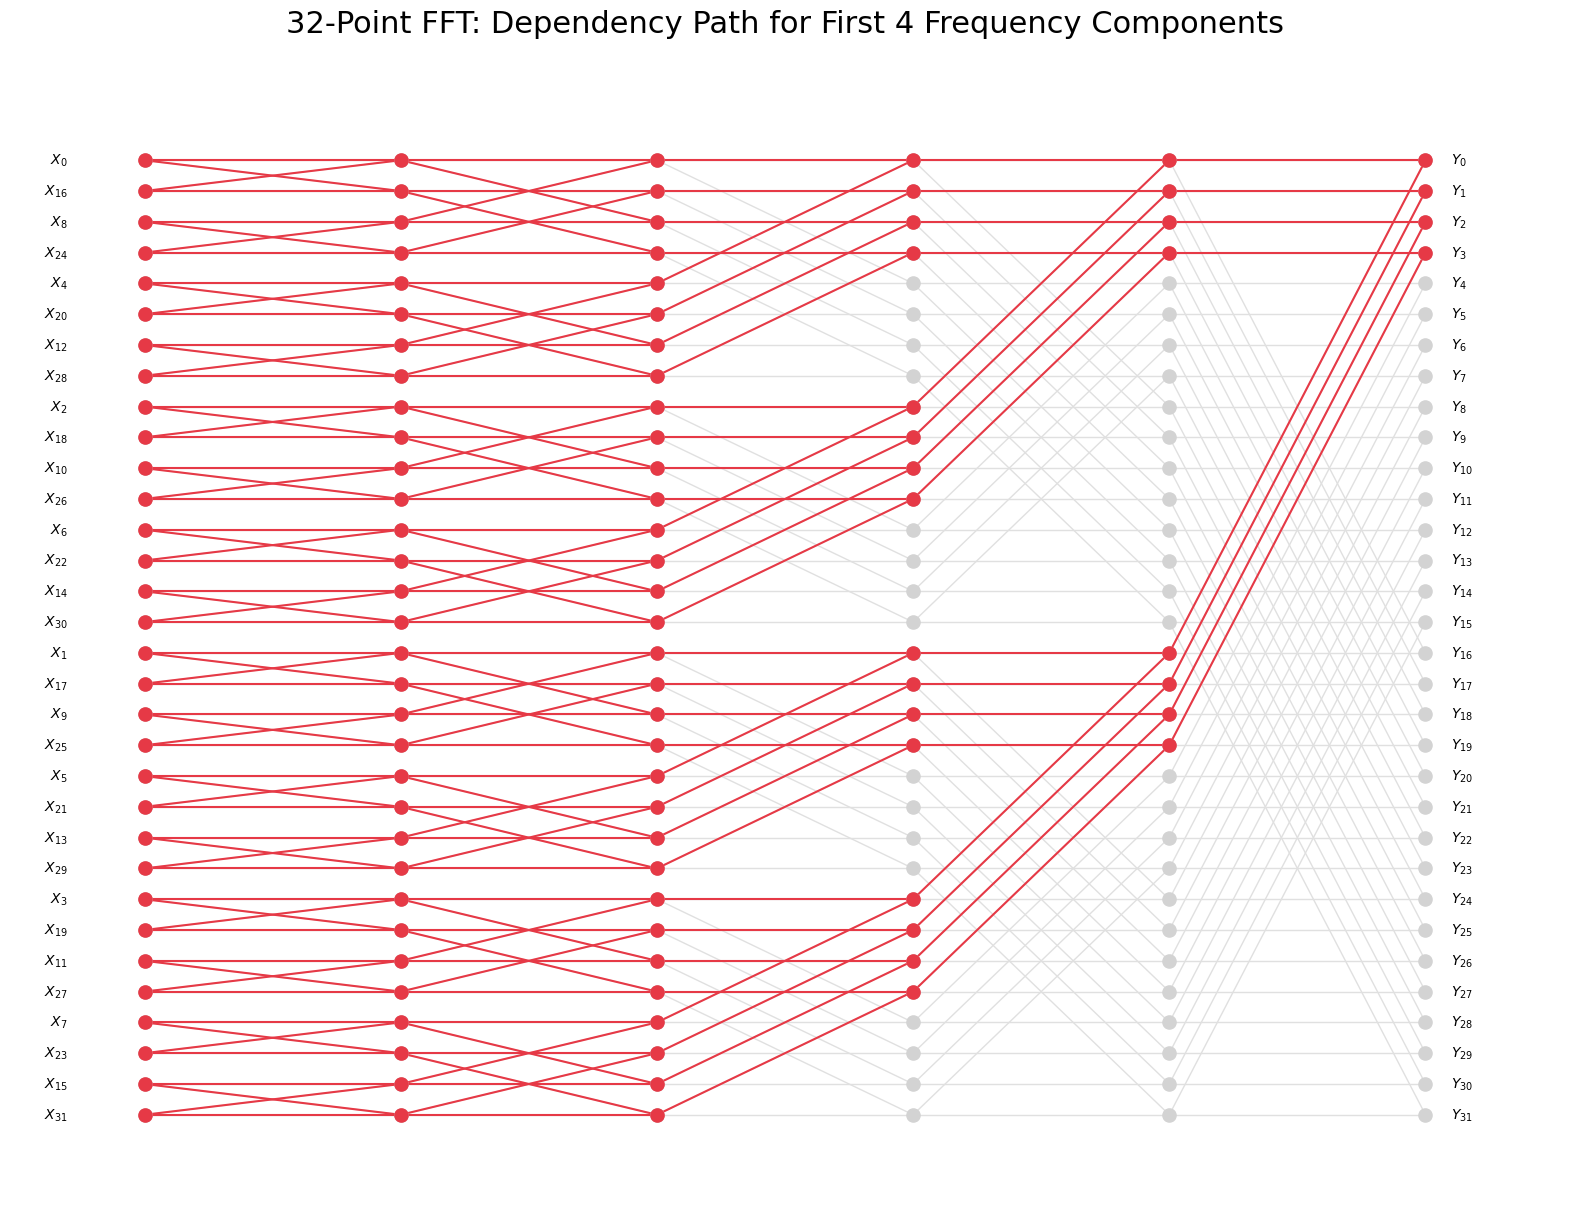

In [25]:
import torch
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from graph_tool.all import *

def bit_reverse_index(n, num_bits):
    reversed_n = 0
    for i in range(num_bits):
        if (n >> i) & 1:
            reversed_n |= 1 << (num_bits - 1 - i)
    return reversed_n

def plot_graph():
    N = 32
    num_layers = int(np.log2(N))

    G = nx.DiGraph()
    pos = {} # node_id = (layer, index of data point)

    for layer in range(num_layers + 1):
        for i in range(N):
            node_id = f"{layer}_{i}"
            G.add_node(node_id)
            pos[node_id] = (layer, -i)
    print(f' pos are: {pos}')
    for s in range(num_layers):
        m = 2 ** (s + 1)
        half_m = m // 2
        for k in range(0, N, m):
            for j in range(half_m):
                u_node = f"{s}_{k + j}"
                v_node = f"{s}_{k + j + half_m}"
                next_u_node = f"{s + 1}_{k + j}"
                next_v_node = f"{s + 1}_{k + j + half_m}"
                G.add_edge(u_node, next_u_node)
                G.add_edge(u_node, next_v_node)
                G.add_edge(v_node, next_u_node)
                G.add_edge(v_node, next_v_node)

    red_nodes = set()
    for i in range(4):
        red_nodes.add(f"{num_layers}_{i}")

    for layer in range(num_layers, 0, -1):
        nodes_in_layer_to_trace = {node for node in red_nodes if node.startswith(f"{layer}_")}
        for node in nodes_in_layer_to_trace:
            for predecessor in G.predecessors(node):
                red_nodes.add(predecessor)

    red_edges = [edge for edge in G.edges() if edge[0] in red_nodes and edge[1] in red_nodes]

    # --- Improved Plotting ---
    fig, ax = plt.subplots(figsize=(20, 15), facecolor='white')
    ax.set_facecolor('white')

    # Draw inactive nodes and edges
    nx.draw_networkx_nodes(G, pos, node_color='#d3d3d3', node_size=90, ax=ax)
    nx.draw_networkx_edges(G, pos, edge_color='#e0e0e0', arrows=False, ax=ax)

    # Draw active nodes and edges
    nx.draw_networkx_nodes(G, pos, nodelist=list(red_nodes), node_color='#e63946', node_size=90, ax=ax)
    nx.draw_networkx_edges(G, pos, edgelist=red_edges, edge_color='#e63946', width=1.5, arrows=False, ax=ax)

    # Add improved labels with CORRECT bit-reversed input
    num_bits = int(np.log2(N))
    for i in range(N):
        # Input labels (Xn) are placed at their bit-reversed position
        original_index = bit_reverse_index(i, num_bits)
        ax.text(-0.3, -i, f'$X_{{{original_index}}}$', ha='right', va='center', fontsize=10, color='black')

        # Output labels (Yn) are in natural order
        ax.text(num_layers + 0.1, -i, f'$Y_{{{i}}}$', ha='left', va='center', fontsize=10, color='black')

    # Configure titles and axes
    ax.set_title("32-Point FFT: Dependency Path for First 4 Frequency Components", fontsize=22, color='black', pad=20)
    ax.set_xticks(range(num_layers + 1))
    ax.set_xticklabels([f"Input\n(Bit-Reversed)"] + [f"Stage {i+1}" for i in range(num_layers)], fontsize=14, color='black')
    ax.tick_params(axis='y', which='both', left=False, labelleft=False)
    ax.tick_params(axis='x', length=0)

    for spine in ax.spines.values():
        spine.set_visible(False)

    plt.show()

if __name__ == '__main__':
    plot_graph()